In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error

from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

In [109]:
model = keras.models.load_model("mymodel.h5")

In [110]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10, 50)            11800     
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 50)            20200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 52,251
Trainable params: 52,251
Non-trainable params: 0
_________________________________________________________________


In [111]:
test_data = pd.read_csv('./datasets/val_cpu.csv', header = None)
test_data.head()

,0,1,2,3,4,5,6,7
0,8.350,64.25,27.607,14.547,0.0,0.034,19.060,4.917
1,7.917,50.00,27.608,14.548,0.0,0.032,13.352,4.838
2,7.794,54.00,27.622,14.549,0.0,0.028,16.533,3.579
3,7.583,51.25,27.606,14.549,0.0,0.042,18.119,4.867
4,7.678,31.00,27.612,14.549,0.0,0.023,12.636,4.842


In [112]:
y_test = test_data[0].values
test = test_data.values

y_test = y_test.reshape(len(y_test), 1)
y_test
scaler1 = MinMaxScaler(feature_range=(0, 1))
y_test_scaled = scaler1.fit_transform(y_test)
y_test_scaled

array([[0.00932398],
       [0.00406025],
       [0.00256501],
       ...,
       [0.0080354 ],
       [0.00385359],
       [0.00533667]])

In [113]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(test)
dataset_scaled

array([[0.00932398, 0.39050536, 0.07091029, ..., 0.00247117, 0.84504685,
        0.76541275],
       [0.00406025, 0.30321593, 0.07124011, ..., 0.00223582, 0.20827755,
        0.72413793],
       [0.00256501, 0.32771822, 0.07585752, ..., 0.00176512, 0.56314145,
        0.06635319],
       ...,
       [0.0080354 , 0.03828484, 0.04221636, ..., 0.00247117, 0.74620705,
        0.84169279],
       [0.00385359, 0.02143951, 0.04485488, ..., 0.00400094, 0.13632307,
        0.73772205],
       [0.00533667, 0.02756508, 0.04815303, ..., 0.00294187, 0.48449353,
        0.053814  ]])

In [117]:
def split_sequences(sequences):
    data = []
    for i in range(len(sequences) - 10):
        seq_data = sequences[i:i+ 10]
        data.append(seq_data)
    return array(data)
x = split_sequences(dataset_scaled)
x[0].shape


(10, 8)

In [115]:
test1 = test1.reshape(1,10,8)

In [92]:
y_pred = model.predict(test1)

In [93]:
y_pred = scaler1.inverse_transform(y_pred)


In [94]:
y_pred

array([[29.82792]], dtype=float32)

In [118]:
y = []
for i in x:
    i = i.reshape(1,10,8)
    y_pred = model.predict(i)
    y_pred = scaler1.inverse_transform(y_pred)
    y.append(y_pred)


In [119]:
y.

[array([[10.200462]], dtype=float32),
 array([[8.603408]], dtype=float32),
 array([[8.260342]], dtype=float32),
 array([[10.67009]], dtype=float32),
 array([[9.278874]], dtype=float32),
 array([[8.428106]], dtype=float32),
 array([[10.201474]], dtype=float32),
 array([[8.916867]], dtype=float32),
 array([[8.69404]], dtype=float32),
 array([[10.712137]], dtype=float32),
 array([[8.990741]], dtype=float32),
 array([[8.344211]], dtype=float32),
 array([[10.002673]], dtype=float32),
 array([[9.11738]], dtype=float32),
 array([[8.592144]], dtype=float32),
 array([[10.3640175]], dtype=float32),
 array([[8.900104]], dtype=float32),
 array([[8.551639]], dtype=float32),
 array([[10.5325365]], dtype=float32),
 array([[9.335169]], dtype=float32),
 array([[8.676226]], dtype=float32),
 array([[9.954637]], dtype=float32),
 array([[9.225994]], dtype=float32),
 array([[8.858287]], dtype=float32),
 array([[10.028603]], dtype=float32),
 array([[9.128806]], dtype=float32),
 array([[8.897723]], dtype=floa

In [122]:
y = array(y)
y.shape

(1159, 1, 1)

In [126]:
y = y.reshape(1159,-1)
y.shape

(1159, 1)

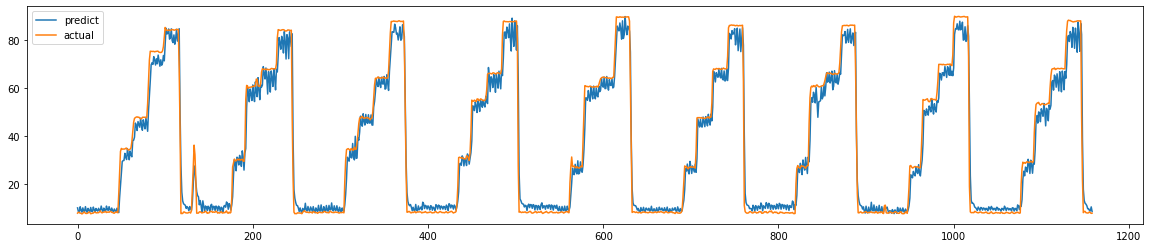

In [127]:
plt.figure(figsize = (20,4))
plt.plot(y, label = "predict")
plt.plot(y_test[10: ], label = "actual")
plt.legend()
plt.show()